#### Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
#### The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The 1st column is the size of the house (in square feet), the 2nd column is the number of bedrooms, the 3rd column is the price of the house. 

In [60]:
# importing the file

import pandas as pd
import numpy as np

data = pd.read_table('ex1data2.txt', header = None, sep=',')
data.reset_index(drop=True, inplace = True)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [61]:
#size    = data.iloc[:,0]      
#bedroom = data.iloc[:,1]   
#feature = data.iloc[:,:2]
#price   = data.iloc[:,2]
m = len(data)              # number of training examples

#x1 = size.to_numpy().reshape(m,1)
#x2 = bedroom.to_numpy().reshape(m,1)
x_ = data.iloc[:,:2].to_numpy(dtype=float)
y  = data.iloc[:,2].to_numpy().reshape(m,1)

x_[:5]

array([[2.104e+03, 3.000e+00],
       [1.600e+03, 3.000e+00],
       [2.400e+03, 3.000e+00],
       [1.416e+03, 2.000e+00],
       [3.000e+03, 4.000e+00]])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b29572b910>,
 'caps': [<matplotlib.lines.Line2D at 0x2b29572bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b29572b5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b29573c6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b29573ca00>],
 'means': []}

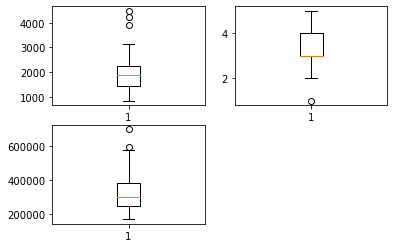

In [62]:
import matplotlib.pyplot as plt

size    = data.iloc[:,0]      
bedroom = data.iloc[:,1]   
price   = data.iloc[:,2]
plot_data = [size, bedroom, price]

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.boxplot(size )
ax2.boxplot(bedroom)
ax3.boxplot(price)
#plt.scatter(size, bedroom, marker ='x', color ='red', size = price)
#plt.xlabel('Size in sq-ft')
#plt.ylabel("No. of bedrooms")


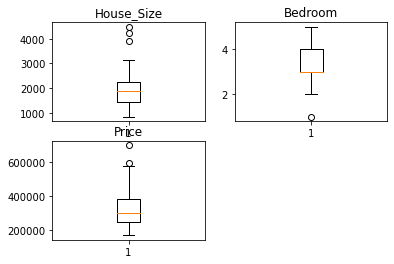

In [46]:
House_Size    = data.iloc[:,0]      
Bedroom       = data.iloc[:,1]   
price         = data.iloc[:,2]
plotdata = [data.iloc[:,0], data.iloc[:,1] , data.iloc[:,2]]

fig = plt.figure()
titles = {221: 'House_Size', 222: 'Bedroom', 223: 'Price'}

for i in range(3):
    ax = fig.add_subplot(list(titles.keys())[i])
    ax.boxplot(plotdata[i])
    ax.title.set_text(list(titles.values())[i])


In [19]:
np.corrcoef(size, price)
np.corrcoef(bedroom, price)

array([[1.        , 0.44226112],
       [0.44226112, 1.        ]])

In [20]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Feature Normalization

In [63]:
# this function will return a normalized version of the input 
# where the mean value of each feature is 0 and the standard deviation is 1.

def FeatureNorm(x):
    x_norm = x
    mu    = np.zeros((1,x.shape[1])) # 2D array of shape(1,2)
    sigma = np.zeros((1,x.shape[1])) # std.deviation

# for each feature dimension, we will compute mean and std.dev.
# next, we will subtract mean from each entry of that feature and divide by std. dev.

    for i in range(x.shape[1]):
        mu[0][i] = x[:,i].mean()
        sigma[0][i] = x[:,i].std()
        x_norm[:,i] = (x[:,i] - mu[0][i])/sigma[0][i]
    
    return x_norm, mu, sigma

In [64]:
x_, mu, sigma = FeatureNorm(x_)

# let's see first 5 entries of our normalized feature columns.
print(x_[:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


In [65]:
# add the bias term
x = np.concatenate((np.ones((m,1)), x_), axis = 1)
x[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

### Gradient Descent

In [66]:
# function to calculate the cost J while we perform the gradient descent

def J(x,y,theta):
    m = len(y)
    x_prime = np.transpose(x)
    theta_prime = np.transpose(theta)
    y_prime = np.transpose(y)
    
    value = np.sum(np.power(np.dot(theta_prime, x_prime) - y_prime,2))
    J = value/ (2 * m)
    return J

In [58]:
# function for Gradient Descent
# will take in the values of initial theta, the training data set, learning rate and number of iterations
# and updates theta by taking gradient steps 

def gradient_des(x,y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters,1)) # a 2D 0 array
    x_prime = np.transpose(x)
    y_prime = np.transpose(y)
    
    for i in range(num_iters):
        # perform a single gradient step on the parameter vector theta
        theta_p = np.transpose(theta)
        
        term1 = np.dot(theta_p, x_prime) - y_prime
        term2 = np.dot(term1, x)
        term3 = np.transpose(term2)
        #derivative_term =  np.transpose(np.dot(, x))
        theta = theta - (alpha/m) * term3
        
        # record each cost for each iteration 
        J_history[i] = J(x,y,theta)
        print("Theta = {}, J = {}, for iteration {}".format(theta, J_history[i],i))
    return theta, J_history

In [134]:
# Choose some initial values
alpha = 0.1
iteration = 1000
theta_start = np.zeros((3,1))


In [135]:
theta, J_history = gradient_des(x,y,theta_start,alpha,iteration)
print("Theta computed from gradient descent: {}, {} and {}".format(theta[0], theta[1], theta[2]))

Theta = [[34041.26595745]
 [10576.41334928]
 [ 5470.88217559]], J = [5.32682599e+10], for iteration 0
Theta = [[64678.40531915]
 [19788.83390392]
 [ 9802.4316721 ]], J = [4.33890843e+10], for iteration 1
Theta = [[92251.83074468]
 [27837.4598369 ]
 [13184.96088065]], J = [3.54574304e+10], for iteration 2
Theta = [[117067.91362766]
 [ 34891.81263413]
 [ 15778.5405121 ]], J = [2.90805547e+10], for iteration 3
Theta = [[139402.38822234]
 [ 41095.49819809]
 [ 17717.74155898]], J = [2.39470789e+10], for iteration 4
Theta = [[159503.41535755]
 [ 46570.22630676]
 [ 19115.63645498]], J = [1.9809573e+10], for iteration 5
Theta = [[177594.33977924]
 [ 51419.20407488]
 [ 20067.17504203]], J = [1.64710108e+10], for iteration 6
Theta = [[193876.17175877]
 [ 55730.00102595]
 [ 20652.03291791]], J = [1.37742034e+10], for iteration 7
Theta = [[208529.82054034]
 [ 59576.96815895]
 [ 20937.01451448]], J = [1.15935242e+10], for iteration 8
Theta = [[221718.10444375]
 [ 63023.28054385]
 [ 20978.08040833]]

 [ -6578.34816227]], J = [2.04328005e+09], for iteration 354
Theta = [[340412.65957447]
 [109447.79007222]
 [ -6578.34845674]], J = [2.04328005e+09], for iteration 355
Theta = [[340412.65957447]
 [109447.79035373]
 [ -6578.34873824]], J = [2.04328005e+09], for iteration 356
Theta = [[340412.65957447]
 [109447.79062285]
 [ -6578.34900737]], J = [2.04328005e+09], for iteration 357
Theta = [[340412.65957447]
 [109447.79088012]
 [ -6578.34926464]], J = [2.04328005e+09], for iteration 358
Theta = [[340412.65957447]
 [109447.79112608]
 [ -6578.3495106 ]], J = [2.04328005e+09], for iteration 359
Theta = [[340412.65957447]
 [109447.79136122]
 [ -6578.34974573]], J = [2.04328005e+09], for iteration 360
Theta = [[340412.65957447]
 [109447.791586  ]
 [ -6578.34997052]], J = [2.04328005e+09], for iteration 361
Theta = [[340412.65957447]
 [109447.7918009 ]
 [ -6578.35018542]], J = [2.04328005e+09], for iteration 362
Theta = [[340412.65957447]
 [109447.79200634]
 [ -6578.35039086]], J = [2.04328005e

 [ -6578.35485416]], J = [2.04328005e+09], for iteration 693
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 694
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 695
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 696
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 697
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 698
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 699
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 700
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 701
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e

### Prediction

In [136]:
# Let's predict the price of a 1650 sq-ft, 3 br house

x1 = np.array([1, 1650, 3], dtype = float).reshape(1,3)

# feature normalization
x1[0][1] = (x1[0][1] - mu[0][0])/sigma[0][0]
x1[0][2] = (x1[0][2] - mu[0][1])/sigma[0][1]

price = float(np.dot(x1, theta))
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): {}".format(price))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293081.46433489595


### Choosing Learning Rate (alpha)

#### The code below will call our gradient_des() function and run it for 50 iterations at the learning rate chosen by the user. At the end of the loop, it will plot the J values against the number of iterations. 
#### We will try values of alpha on a log-scale at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
#### NOTE: With a small learning rate, the gradient descent takes a very long time to converge to the optimal value. Conversely, ff the learning rate is too large, J(theta) can diverge and blow up, resulting in values which are too large for computer calculations.

Please enter the learning rate0.01
Theta = [[3404.12659574]
 [1057.64133493]
 [ 547.08821756]], J = [6.42977763e+10], for iteration 0
Theta = [[6774.21192553]
 [2101.64274191]
 [1082.78310833]], J = [6.30310183e+10], for iteration 1
Theta = [[10110.59640202]
 [ 3132.20441912]
 [ 1607.2749847 ]], J = [6.17906942e+10], for iteration 2
Theta = [[13413.61703375]
 [ 4149.52349706]
 [ 2120.75113489]], J = [6.05762369e+10], for iteration 3
Theta = [[16683.60745915]
 [ 5153.79408617]
 [ 2623.39587038]], J = [5.93870917e+10], for iteration 4
Theta = [[19920.89798031]
 [ 6145.20732373]
 [ 3115.39057257]], J = [5.82227165e+10], for iteration 5
Theta = [[23125.81559625]
 [ 7123.95141992]
 [ 3596.91373875]], J = [5.70825809e+10], for iteration 6
Theta = [[26298.68403603]
 [ 8090.21170335]
 [ 4068.14102732]], J = [5.59661664e+10], for iteration 7
Theta = [[29439.82379141]
 [ 9044.17066566]
 [ 4529.2453023 ]], J = [5.48729661e+10], for iteration 8
Theta = [[32549.55214924]
 [ 9986.00800564]
 [ 4980.3

Text(0, 0.5, 'Cost J')

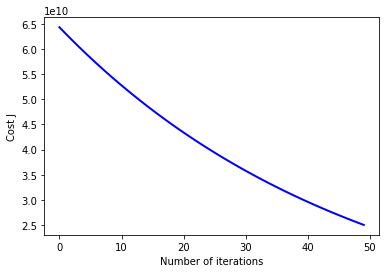

In [73]:
alpha = float(input("Please enter the learning rate"))
iteration = 50

theta_start = np.zeros((3,1))

theta, J_history = gradient_des(x,y,theta_start,alpha,iteration)

plt.plot(range(iteration), J_history, '-b', linewidth = 2 )
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")

In [145]:
# 1 is our best learning rate. Let's use this to find theta values again.

alpha = 1
iteration = 1000
theta_start = np.zeros((3,1))

theta, J_history = gradient_des(x,y,theta_start,alpha,iteration)
print("Theta computed from gradient descent: {}, {} and {}".format(theta[0], theta[1], theta[2]))

Theta = [[340412.65957447]
 [105764.13349282]
 [ 54708.82175587]], J = [3.80170482e+09], for iteration 0
Theta = [[340412.65957447]
 [ 75128.98752157]
 [ -4515.62439531]], J = [2.59465747e+09], for iteration 1
Theta = [[340412.65957447]
 [108292.73506129]
 [ 12639.05264869]], J = [2.21617176e+09], for iteration 2
Theta = [[340412.65957447]
 [ 98686.67851565]
 [ -5931.55834649]], J = [2.09749254e+09], for iteration 3
Theta = [[340412.65957447]
 [109085.61163747]
 [  -552.48171792]], J = [2.0602791e+09], for iteration 4
Theta = [[340412.65957447]
 [106073.50513584]
 [ -6375.54322623]], J = [2.04861033e+09], for iteration 5
Theta = [[340412.65957447]
 [109334.22860934]
 [ -4688.86236935]], J = [2.04495143e+09], for iteration 6
Theta = [[340412.65957447]
 [108389.74264531]
 [ -6514.76057693]], J = [2.04380413e+09], for iteration 7
Theta = [[340412.65957447]
 [109412.18576001]
 [ -5985.87941211]], J = [2.04344438e+09], for iteration 8
Theta = [[340412.65957447]
 [109116.02965272]
 [ -6558.4

Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 434
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 435
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 436
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 437
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 438
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 439
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 440
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 441
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 442
Theta = [[340412.65957447]
 [109447.7

 [ -6578.35485416]], J = [2.04328005e+09], for iteration 819
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 820
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 821
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 822
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 823
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 824
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 825
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 826
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e+09], for iteration 827
Theta = [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]], J = [2.04328005e

### Using Normal Equation

#### The closed-form solution to linear regression is 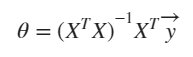
#### Using this formula does not require any feature scaling and we will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

In [75]:
def normalEqn(x,y):
    theta = np.zeros((x.shape[1], 1)) # 2D (3x1) matrix
    x_prime = np.transpose(x)
    term1 = np.linalg.inv(np.dot(x_prime,x))
    term2 = np.dot(term1, x_prime)
    theta = np.dot(term2, y)
    return theta

In [77]:
data = pd.read_table('ex1data2.txt', header = None, sep=',')
#data.reset_index(drop=True, inplace = True)

#price = data.iloc[:,2]
m = len(data)

x_ = data.iloc[:,:2].to_numpy(dtype=float)
x = np.concatenate((np.ones((m,1)), x_), axis = 1)
y  = data.iloc[:,2].to_numpy().reshape(m,1)

theta = normalEqn(x,y)

print("Theta computed from the normal equations: {}, {}, and {}".format(theta[0], theta[1], theta[2]))

Theta computed from the normal equations: [89597.9095428], [139.21067402], and [-8738.01911233]
